In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
poa = gpd.read_file("Shape\poa_selected.gpkg")

In [7]:
rego = pd.read_csv("Data\Whole_Fleet_Vehicle_Registration_Snapshot_by_Postcode_Q2_2023.csv")
evs = rego[rego["CD_CL_FUEL_ENG"]=="E "] # Get only Eletric 
evs = evs[(evs["POSTCODE"] >= 3000) & (evs["POSTCODE"] < 4000) ] # Get Vic Postcodes 
evs = evs[evs["NB_YEAR_MFC_VEH"].astype(int) > 2018]

In [8]:
evs["TOTAL1"].max()

269

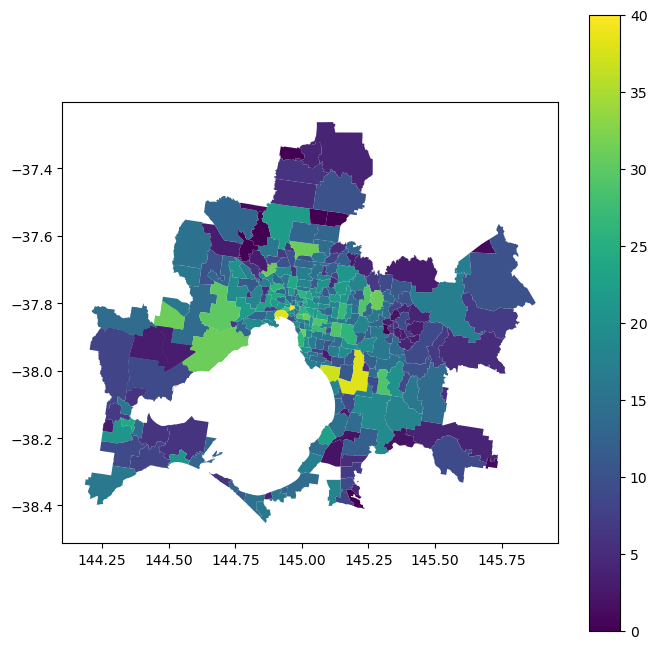

In [3]:
rego = pd.read_csv("Data\Whole_Fleet_Vehicle_Registration_Snapshot_by_Postcode_Q2_2023.csv")
evs = rego[rego["CD_CL_FUEL_ENG"]=="E "] # Get only Eletric 
evs = evs[(evs["POSTCODE"] >= 3000) & (evs["POSTCODE"] < 4000) ] # Get Vic Postcodes 
evs = evs[evs["NB_YEAR_MFC_VEH"].astype(int) > 2018] # Remove E older than 2018 (last 5 years)
evs = evs[evs["TOTAL1"] <= 2]
evs = evs.reset_index(drop=True)
evs = evs[["POSTCODE", "TOTAL1"]]
evs = evs.groupby("POSTCODE").sum().reset_index()
evs["POSTCODE"] = evs["POSTCODE"].astype(str)
evs_merged = poa.merge(evs, left_on="POA_CODE21", right_on="POSTCODE", how="left").drop(columns="POSTCODE")
evs_merged["TOTAL1"].fillna(0, inplace=True)
ev_totals = evs_merged[["POA_CODE21","TOTAL1"]]

# Plotting 
fig, axes = plt.subplots(1,1, figsize=(8, 8))
poa_ev = poa.merge(ev_totals, on="POA_CODE21", how="inner")
poa_ev.plot(ax=axes, column="TOTAL1", cmap='viridis', legend=True)
plt.show()

In [5]:
ev_totals.to_csv("Data\poa_ev.csv", index=False)